<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r10_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-1-r10.csv?token=AKVFSOC76AIFOVTWA6B5Y4K63I6YK')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-normal-n-0-15-r10.csv?token=AKVFSOBIWMVOSTJDKPI5LYS63I6ZC')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,146,2,4,4,1,1,5,17,24,8,15,15,4,4,2,0.500000,12,29,1,29,29,8,16,20,340,0
1,146,2,4,4,1,1,5,17,24,8,15,15,3,4,2,0.500000,12,22,1,22,22,8,12,20,340,1
2,147,2,4,4,2,2,5,17,24,8,15,15,3,4,2,0.500000,13,21,2,22,42,8,48,20,340,1
3,147,2,4,4,2,2,5,17,24,8,15,15,4,4,2,0.500000,13,28,2,29,56,8,64,20,340,0
4,148,2,4,4,3,2,5,17,24,8,15,15,3,4,2,0.500000,14,20,3,22,60,8,72,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83338,3276918,4,2,6,2,2,3,9,27,11,24,8,30095,3,1,0.333333,15,5,15,19,75,8,722280,18,162,0
83339,3276925,4,2,6,3,2,3,9,27,11,24,8,30095,3,1,0.333333,22,4,16,19,64,8,1083420,18,162,0
83340,3276932,4,2,6,4,2,3,9,27,11,24,8,30095,3,1,0.333333,29,3,17,19,51,8,1444560,18,162,0
83341,3276939,4,2,6,5,3,3,9,27,11,24,8,30095,3,1,0.333333,36,2,18,19,36,8,2708550,18,162,0


In [6]:
df.shape

(83343, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-11-r10.csv?token=AKVFSOF6CTQCKY7F6NUI5SS63I6YO')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-12-r10.csv?token=AKVFSOFVGIPVBC454BZZIYS63JR4K')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-7-r10.csv?token=AKVFSOBYE5BQE7QZ4AMG2NS63JR4O')


In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(67981, 26)
(51935, 26)
(49969, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.475494,0.178044,0.060245,-0.090118,0.224852,0.274648,0.033822,0.106778,-0.792259,-0.903774,-0.369295,-0.104514,0.021751,-0.063378,-0.056741,0.454369,0.072978,0.323845,0.320587,-0.031465
inport,-0.475494,1.000000,-0.274289,0.002021,-0.003023,0.410474,0.333579,-0.001267,0.453996,0.599375,0.492157,-0.056727,-0.041837,0.015023,-0.020533,-0.038729,0.486237,-0.080729,0.091753,0.277343,0.014433
cache_coherence_type,0.178044,-0.274289,1.000000,0.269098,-0.402532,-0.233323,-0.225407,0.035219,-0.157024,-0.213254,-0.234094,-0.160926,0.067935,-0.012614,0.042364,0.044375,-0.127422,0.306105,0.651261,0.140251,0.001851
flit_id,0.060245,0.002021,0.269098,1.000000,-0.048007,0.225022,0.205483,0.003543,0.138482,0.037436,-0.030958,0.368715,-0.032468,0.037591,0.003923,0.001703,0.076119,0.641786,0.399857,0.317482,-0.000672
flit_type,-0.090118,-0.003023,-0.402532,-0.048007,1.000000,-0.336600,-0.307372,-0.005300,-0.207148,-0.055998,0.046309,0.293743,-0.064118,0.058925,-0.003977,0.001043,-0.113863,0.111966,-0.598128,-0.474908,0.001004
vnet,0.224852,0.410474,-0.233323,0.225022,-0.336600,1.000000,0.983087,-0.010542,0.613899,-0.100280,-0.254734,-0.449955,-0.084032,0.034276,-0.038102,-0.052458,0.648114,-0.030706,0.585955,0.924806,-0.007954
vc,0.274648,0.333579,-0.225407,0.205483,-0.307372,0.983087,1.000000,-0.009366,0.568512,-0.175586,-0.335148,-0.448740,-0.080181,0.049262,-0.023677,-0.036995,0.598913,-0.033255,0.579353,0.928857,-0.009916
traversal_id,0.033822,-0.001267,0.035219,0.003543,-0.005300,-0.010542,-0.009366,1.000000,-0.025292,-0.029515,-0.019465,0.002649,0.090227,0.091097,0.138853,0.073064,0.031048,0.549572,0.021123,0.002415,-0.305742
hop_count,0.106778,0.453996,-0.157024,0.138482,-0.207148,0.613899,0.568512,-0.025292,1.000000,0.351840,-0.001796,-0.124055,-0.119751,-0.047397,-0.127997,-0.133146,0.580971,-0.042901,0.348227,0.543025,0.034384
current_hop,-0.792259,0.599375,-0.213254,0.037436,-0.055998,-0.100280,-0.175586,-0.029515,0.351840,1.000000,0.878483,0.474603,0.032813,-0.065650,-0.025145,-0.030635,-0.145848,-0.053536,-0.255972,-0.223317,0.031833


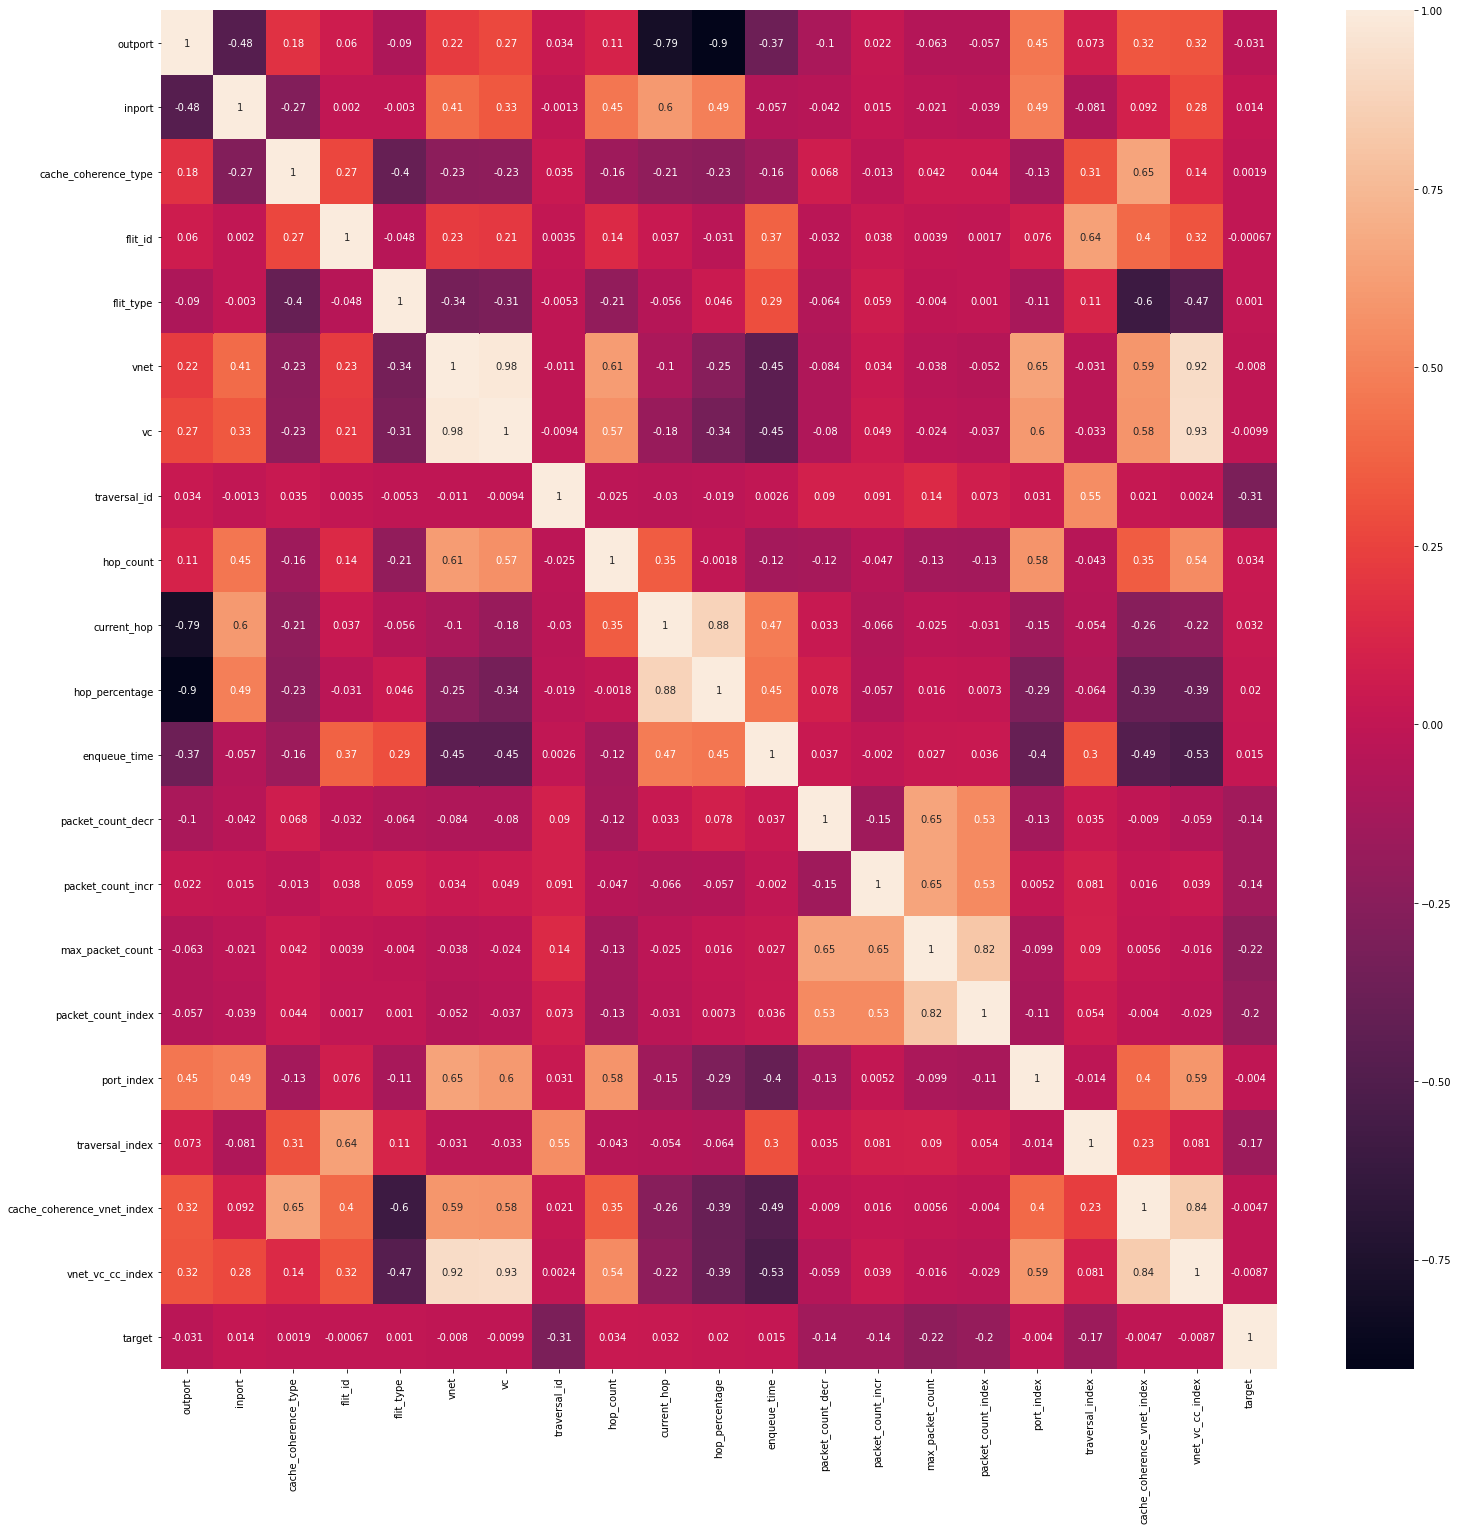

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['outport', 'vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

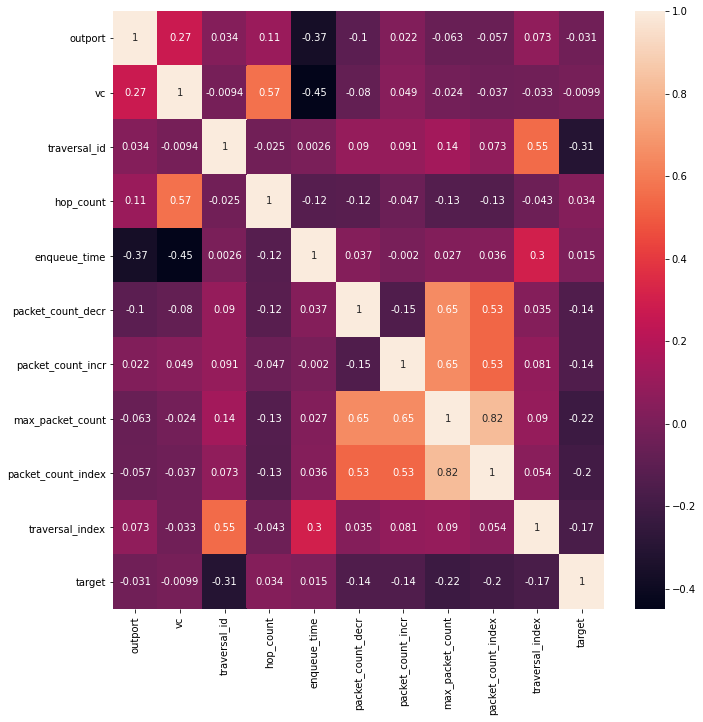

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

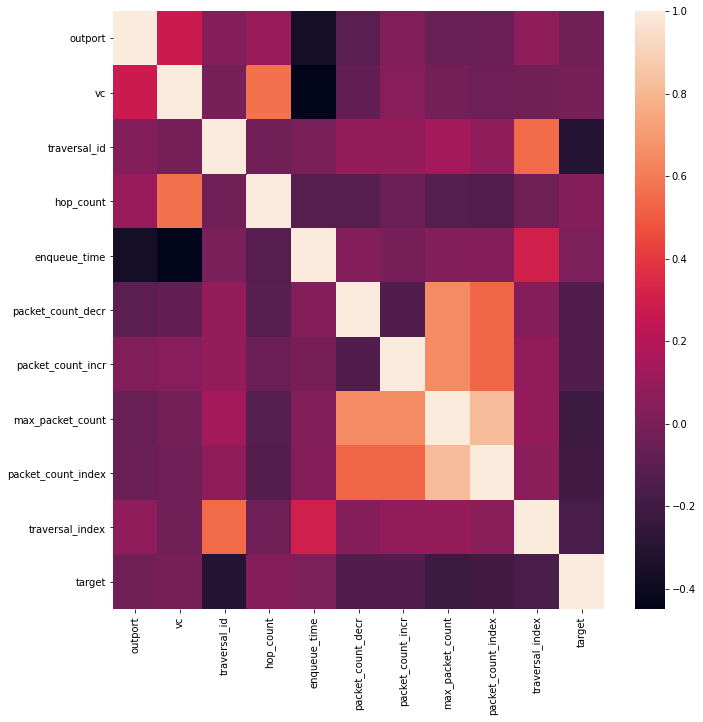

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.888889,0.000033,0.666667,0.133333,0.207407,0.000000,0.207407,0.005969,0.000001
1,0.5,0.888889,0.000000,0.666667,0.133333,0.155556,0.000000,0.155556,0.004477,0.000000
2,0.5,0.888889,0.000000,0.666667,0.150000,0.148148,0.007407,0.155556,0.008740,0.000013
3,0.5,0.888889,0.000033,0.666667,0.150000,0.200000,0.007407,0.207407,0.011725,0.000019
4,0.5,0.888889,0.000000,0.666667,0.166667,0.140741,0.014815,0.155556,0.012577,0.000022
...,...,...,...,...,...,...,...,...,...,...
83338,1.0,0.000000,0.999967,0.333333,0.183333,0.029630,0.103704,0.133333,0.015775,0.266663
83339,1.0,0.000000,0.999967,0.333333,0.300000,0.022222,0.111111,0.133333,0.013430,0.399997
83340,1.0,0.000000,0.999967,0.333333,0.416667,0.014815,0.118519,0.133333,0.010659,0.533331
83341,1.0,0.000000,0.999967,0.333333,0.533333,0.007407,0.125926,0.133333,0.007461,1.000000


In [20]:
train_X[train_X.duplicated()].shape

(18, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000000,0.5,0.066667,0.275168,0.000000,0.275168,0.007194,0.000000
1,0.50,0.888889,0.000000,0.5,0.133333,0.268456,0.006711,0.275168,0.014213,0.000000
2,0.50,0.888889,0.000000,0.5,0.150000,0.261745,0.013423,0.275168,0.020881,0.000018
3,0.50,0.888889,0.000000,0.5,0.166667,0.255034,0.020134,0.275168,0.027198,0.000030
4,0.50,0.888889,0.000000,0.5,0.183333,0.248322,0.026846,0.275168,0.033164,0.000041
...,...,...,...,...,...,...,...,...,...,...
67976,0.75,0.000000,0.999934,0.5,0.483333,0.026846,0.020134,0.046980,0.003334,0.444618
67977,0.75,0.000000,0.999934,0.5,0.600000,0.020134,0.026846,0.046980,0.003334,0.833665
67978,0.75,0.111111,0.999967,0.5,0.600000,0.013423,0.033557,0.046980,0.002983,0.044458
67979,1.00,0.000000,1.000000,0.5,0.066667,0.006711,0.040268,0.046980,0.002281,0.066692


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    49633
1    33710
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  891.733869
9     traversal_index  280.060983
7    max_packet_count  279.950600
8  packet_count_index  257.270673
6   packet_count_incr  143.601489
5   packet_count_decr  136.393102
3           hop_count   18.555520
0             outport   10.347603
1                  vc    2.204911
4        enqueue_time    1.512234


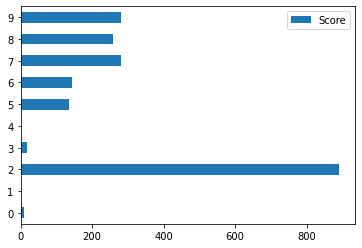

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.38533999534376
Test Prediction Score 94.44808027923212


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 76.65082890807726
Test Prediction Score 79.12005391354577
Test Prediction Score 75.23064299865916


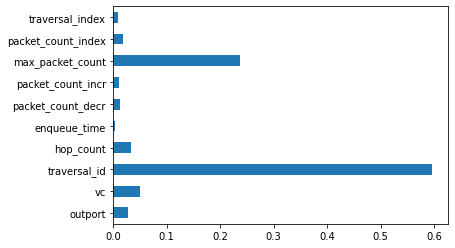

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

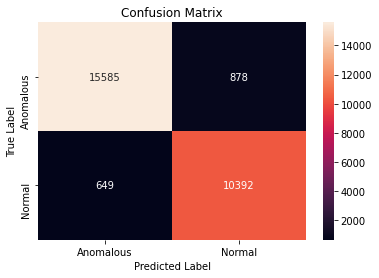

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     16463
           1       0.92      0.94      0.93     11041

    accuracy                           0.94     27504
   macro avg       0.94      0.94      0.94     27504
weighted avg       0.94      0.94      0.94     27504



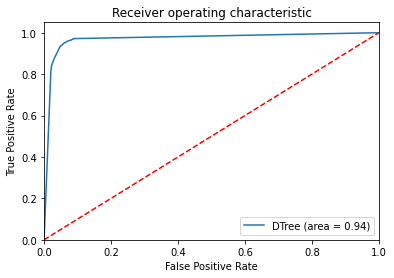

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r10l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.9856730958649
Test Prediction Score 99.19648051192553


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 80.40040599579295
Test Prediction Score 81.55964186001732
Test Prediction Score 79.42924613260222


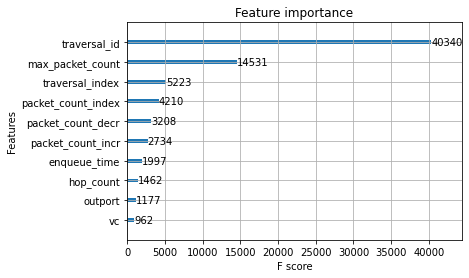

In [45]:
plot_importance(xgbc)
plt.show()

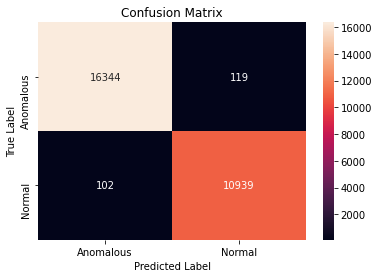

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16463
           1       0.99      0.99      0.99     11041

    accuracy                           0.99     27504
   macro avg       0.99      0.99      0.99     27504
weighted avg       0.99      0.99      0.99     27504



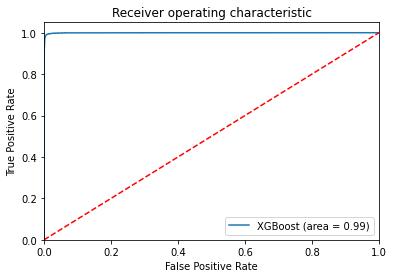

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()